## Pandas analysis

In the following a series of exercises is proposed on a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGA's. Each measurement (i.e. each raw) consists of the address of the TDC providing the signal, 'FPGA' and 'TDC_Channel, and the timing information itself, 'ORBIT_CNT', 'BX_COUNTER' and 'TDC_MEAS'. Each TDC count correspond 25/30 ns, whereas the BX_COUNTER feauters gets updated every 25 ns and the ORBIT_CNT every 'x' BX_COUNTER. You can see these way of storing the time as similar to hours, minutes and seconds.

1\. Create a Pandas DataFrame by read N raws of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of raws and larger that 10k.

In [1]:
import numpy as np
import pandas as pd
file_name="C:\\Users\\TEST\\LaboratoryOfComputationalPhysics\\data\\data_000637.txt"
N = 15000
df=pd.read_csv(file_name)[:N]
df.head()
#df.describe()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25


2\. Find out the value of 'x'

In [2]:
x = df.BX_COUNTER/df.ORBIT_CNT
print(x.head())

0    6.135635e-07
1    6.135635e-07
2    6.598263e-07
3    6.611185e-07
4    7.133257e-07
dtype: float64


3\. Find out how much the data taking lasted. You can either make an estimate on the baseis of the fraction of the measurements (raws) you read, or perform this check precisely by reading out the whole dataset

In [3]:
ORBIT_TIME = x*25
BX_TIME = df.BX_COUNTER*25
TDC_TIME = df.TDC_MEAS*(25/30)
print(ORBIT_TIME.head())
print(BX_TIME.head())
print(TDC_TIME.head())

0    0.000015
1    0.000015
2    0.000016
3    0.000017
4    0.000018
dtype: float64
0    59350
1    59350
2    63825
3    63950
4    69000
Name: BX_COUNTER, dtype: int64
0    21.666667
1    22.500000
2    23.333333
3    15.833333
4    20.833333
Name: TDC_MEAS, dtype: float64


4\. Create a new column with the actual time in ns (as a combination of the other three columns with timing information)

In [4]:
df["Time in ns"] = ORBIT_TIME+BX_TIME+TDC_TIME
df.head()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time in ns
0,1,0,123,3869200167,2374,26,59371.666682
1,1,0,124,3869200167,2374,27,59372.500015
2,1,0,63,3869200167,2553,28,63848.333350
3,1,0,64,3869200167,2558,19,63965.833350
4,1,0,64,3869200167,2760,25,69020.833351


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1

In [5]:
df.HEAD=[np.random.choice([0,1]) for i in range(df.shape[0])]
df.head()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time in ns
0,1,0,123,3869200167,2374,26,59371.666682
1,0,0,124,3869200167,2374,27,59372.500015
2,0,0,63,3869200167,2553,28,63848.333350
3,0,0,64,3869200167,2558,19,63965.833350
4,0,0,64,3869200167,2760,25,69020.833351


6\. Create a new DataFrame with only the raws with HEAD=1

In [6]:
df2 = pd.DataFrame([1 for i in range(df.shape[0])],columns=["HEAD"])
df2.head()

,HEAD
0,1
1,1
2,1
3,1
4,1


7\. Make two occupancy plots (one per FPGA), i.e. plot the number of counts per TDC channel

C:\Users\TEST\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()
C:\Users\TEST\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


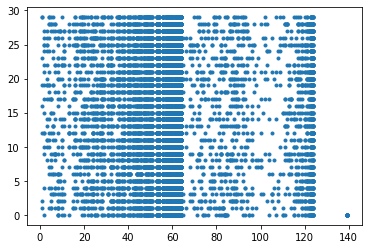

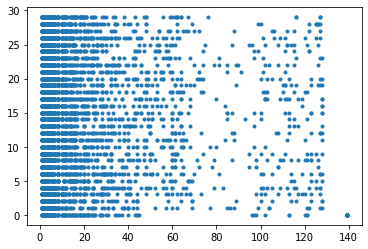

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
#0 refers to FPGA 0
#1 refers to FPGA 1
df0 = df[df["FPGA"]==0]#we consider only that dataframe where the FPGA number is 0
x0 = df0["TDC_CHANNEL"] #TDC channel for fpga 0 
y0 = df0["TDC_MEAS"]

df1 = df[df["FPGA"]==1]
x1 = df1["TDC_CHANNEL"] #TDC channel for fpga 0 
y1 = df1["TDC_MEAS"]

f = plt.figure()
plt.plot(x0,y0,".")
f.show()

g = plt.figure()
plt.plot(x1,y1,'.')
g.show()

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [8]:
gdf = df.groupby(['FPGA'])#Group the data on the basis of FPGA 0 or 1.
df0 = gdf.get_group(0)#Get only the dataframe corresponding to 0
df1 = gdf.get_group(1)#Get only the dataframe corresponding to 1
print(df0.sort_values(by='TDC_MEAS',ascending=False).head(3),'\n')
print(df1.sort_values(by='TDC_MEAS',ascending=False).head(3))





      HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS    Time in ns
3142     1     0           56  3869200198        2430        29  60774.166682
2808     1     0           49  3869200194        2566        29  64174.166683
8227     0     0           58  3869200249        2386        29  59674.166682 

      HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS    Time in ns
5844     0     1            1  3869200225        3292        29  82324.166688
2575     1     1           14  3869200193        1904        29  47624.166679
7437     1     1            8  3869200241        2582        29  64574.166683


9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [9]:
#df0["ORBIT_CNT"].value_counts(ascending=True)#Return a Series containing counts of unique values.
#df1["ORBIT_CNT"].value_counts(ascending=True)#Return a Series containing counts of unique values.
df["ORBIT_CNT"].value_counts()#Return a Series containing counts of unique values.


3869200218    180
3869200194    164
3869200254    163
3869200290    162
3869200309    160
             ... 
3869200270     47
3869200217     46
3869200167     43
3869200200     40
3869200189     38
Name: ORBIT_CNT, Length: 150, dtype: int64

In [10]:
Ch_group = df.groupby("TDC_CHANNEL")
TDCch_139 = Ch_group.get_group(139)
TDCch_139
TDCch_139["ORBIT_CNT"].value_counts(ascending=True)


3869200236     3
3869200189     3
3869200223     3
3869200167     4
3869200291     4
              ..
3869200261    14
3869200218    15
3869200309    15
3869200185    15
3869200303    15
Name: ORBIT_CNT, Length: 150, dtype: int64